# 感知机

输入: 训练数据集$T = \lbrace(x_1, y_1, (x_2,y_2), ... , (x_N, y_N)\rbrace$, 其中$x_1 \in X = R^n$,
$y_i \in Y = \lbrace-1, +1\rbrace$, $i = 1, 2, ... , N$; 学习率$\eta(0 < \eta \leq 1)$

输出: $w, b$; 感知机模型$f(x) = sign(w \cdot x + b)$

(1) 选取初值$w_0, b_0$

(2) 在训练集中选取数据$(x_i, y_i)$

(3) 如果$y_i(w \cdot x_i + b) \leq 0$

$$w \leftarrow w + \eta y_i x_i$$

$$b \leftarrow b + \eta y_i$$

(4) 转至(2), 直至训练集中没有误分类点

数据集选取sklearn中iris, 并且以长度(sepal length)和宽度(sepal width)作为特征

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = iris.target
# print(df.columns)
# print(df)

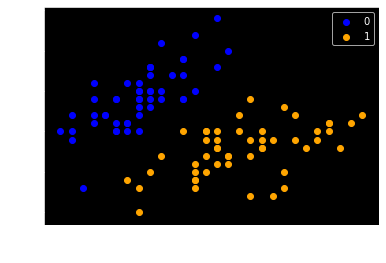

In [3]:
plt.scatter(df[0: 50]['sepal length (cm)'], df[0: 50]['sepal width (cm)'], color = 'blue', label = '0')
plt.scatter(df[50: 100]['sepal length (cm)'], df[50: 100]['sepal width (cm)'], color = 'orange', label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [4]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y])  # 将label转换为{-1, 1}

## Perceptron

In [5]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.01

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    # wrong_count += np.abs(y * self.sign(X, self.w, self.b))
                    wrong_count += 1
            # print(wrong_count)
            if wrong_count == 0:
                is_wrong = True
        return 'Finished!'

In [6]:
perceptron = Model()
perceptron.fit(X, y)

'Finished!'

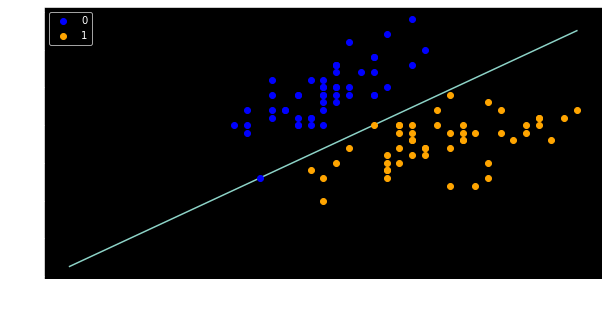

In [7]:
plt.figure(figsize=(10,5))

x_points = np.linspace(3, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()